<a href="https://colab.research.google.com/github/cprietosegura/Breast-Cancer-Detector-Model/blob/master/randomforest_gridsearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import cv2
import os
import h5py
import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import pickle

In [0]:
def importDfPickle(path):
    with open(path, 'rb') as f:
        df = pickle.load(f)
    return df

In [0]:
df=importDfPickle("/content/drive/My Drive/IRONHACK/breast_cancer_2000m.pkl") 

In [0]:
df.head()

,label,image,path
0,1,"[[[222, 212, 239], [230, 224, 245], [235, 231,...",images/1/12867_idx5_x1851_y1351_class1.png
1,1,"[[[194, 170, 222], [188, 167, 219], [192, 171,...",images/1/16167_idx5_x2201_y1701_class1.png
2,1,"[[[160, 117, 172], [159, 127, 207], [158, 116,...",images/1/12821_idx5_x1651_y1551_class1.png
3,1,"[[[220, 204, 226], [229, 223, 241], [223, 205,...",images/1/13691_idx5_x3651_y1901_class1.png
4,1,"[[[169, 123, 176], [132, 86, 134], [136, 83, 1...",images/1/14154_idx5_x1801_y1501_class1.png


In [0]:
from scipy.fftpack import fft

def fftransform(array):
    '''fft to all the array images (column in this case)'''
    return np.abs(fft(array,512))


In [0]:
df['image']=df['image'].apply(lambda x: fftransform(x))

In [0]:
#df['fft']

0       [[[673.0, 672.9653198828695, 672.8612847595729...
1       [[[586.0, 585.9687767068692, 585.8751115485961...
2       [[[449.0, 448.9750251601068, 448.9001044067638...
3       [[[650.0, 649.9664211906766, 649.865689820253,...
4       [[[468.0, 467.9740300184274, 467.8961239863824...
                              ...                        
1995    [[[621.0, 620.9671013738873, 620.8684104651053...
1996    [[[650.0, 649.9673960121944, 649.8695889588355...
1997    [[[663.0, 662.9659036755203, 662.8636198391363...
1998    [[[706.0, 705.9640091856078, 705.8560421627883...
1999    [[[432.0, 431.97557847175136, 431.902317576249...
Name: fft, Length: 2000, dtype: object

In [0]:
df.head()

,label,image,path
0,1,"[[[673.0, 672.9653198828695, 672.8612847595729...",images/1/12867_idx5_x1851_y1351_class1.png
1,1,"[[[586.0, 585.9687767068692, 585.8751115485961...",images/1/16167_idx5_x2201_y1701_class1.png
2,1,"[[[449.0, 448.9750251601068, 448.9001044067638...",images/1/12821_idx5_x1651_y1551_class1.png
3,1,"[[[650.0, 649.9664211906766, 649.865689820253,...",images/1/13691_idx5_x3651_y1901_class1.png
4,1,"[[[468.0, 467.9740300184274, 467.8961239863824...",images/1/14154_idx5_x1801_y1501_class1.png


In [0]:
X=np.asarray(list(df['image']))
X = X.reshape(X.shape[0], -1)
y=np.asarray(df['label'])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
# create the model - Random Forests
rfc  = RandomForestClassifier(random_state=42)

In [0]:
param_grid = { 
    'n_estimators': [250,500],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [7,8],
    'criterion' :['gini', 'entropy']}


In [0]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [0]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [0]:
rfc_best=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=8, criterion='entropy')

In [0]:
rfc_best_model=rfc_best.fit(X_train, y_train)

In [0]:
rfc_pred = rfc_best.predict(X_test)

In [0]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,accuracy_score

print("Mean Absolute Error is :", mean_absolute_error(y_test, rfc_pred))
print('Mean Squared Error is :', mean_squared_error(y_test, rfc_pred))
print('The R2 score value is :', r2_score(y_test, rfc_pred)*100)
print("Accuracy:", accuracy_score(y_test,rfc_pred))

Mean Absolute Error is : 0.19
Mean Squared Error is : 0.19
The R2 score value is : 23.998099952498798
Accuracy: 0.81


,gt,predicted,proba Maligno,proba Beningno
0,0,0,0.110962,0.889038
1,1,1,0.732100,0.267900
2,0,0,0.121577,0.878423
3,1,1,0.630631,0.369369
4,0,0,0.045928,0.954072


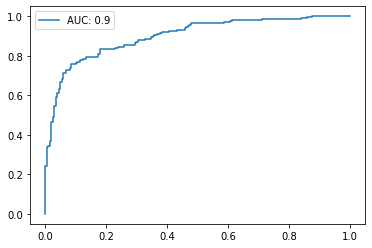

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_score = rfc_best.predict_proba(X_test)

#print(y_score)
roc = roc_curve(y_test, y_score[:,1])
display(pd.DataFrame({
    "gt":y_test,
    "predicted":rfc_pred,
    "proba Maligno":y_score[:,1],
    "proba Beningno":y_score[:,0]
}).head())

plt.plot(roc[0],roc[1])
plt.legend(["AUC: {}".format(round(roc_auc_score(y_test, y_score[:,1]),2))])

In [0]:
pd.crosstab(y_test, rfc_pred, rownames=['Actual Result'], colnames=['Predicted Result'])

Predicted Result,0,1
Actual Result,,
0,166,35
1,41,158


In [0]:
import pickle
def saveTrainedModel(model,modelname):
    filename = '/content/drive/My Drive/IRONHACK/{}.sav'.format(modelname)
    pickle.dump(model, open(filename, 'wb')) 

In [0]:
modelname='rfc_model_acu81_auc90'
saveTrainedModel(rfc_best_model,modelname)